In [1]:
# Import libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults


In [5]:
series = pd.read_csv("C:\\Users\\Anks\\Downloads\\CocaCola_Sales_Rawdata.csv", header=0, index_col=0, parse_dates=True,encoding="latin-1")
series



,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


<AxesSubplot:xlabel='Quarter'>

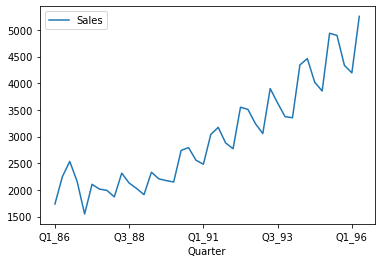

In [6]:
# line plot of time series
#plt.figure(figsize=(24,7))
series.plot()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

<Figure size 1728x504 with 0 Axes>

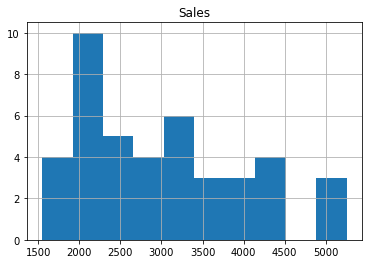

In [7]:
plt.figure(figsize=(24,7))
series.hist()

<AxesSubplot:ylabel='Density'>

<Figure size 1728x504 with 0 Axes>

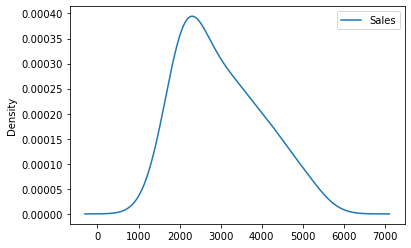

In [8]:
plt.figure(figsize=(24,7))
series.plot(kind='kde')

C:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


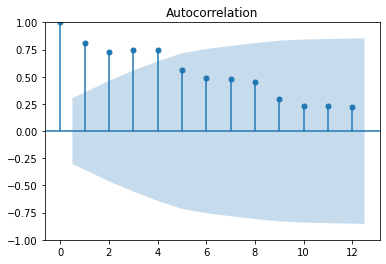

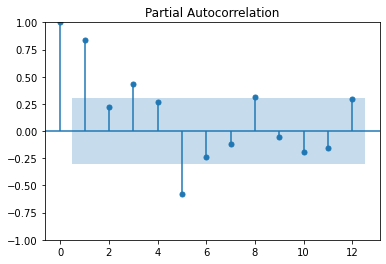

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(series.Sales,lags=12)
tsa_plots.plot_pacf(series.Sales,lags=12)
plt.show()

# Moving Average Method

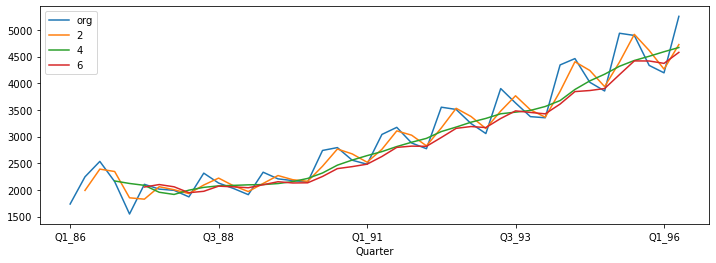

In [16]:
plt.figure(figsize=(12,4))
series.Sales.plot(label="org")
for i in range(2,8,2):
   series["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time Series Decomposition plot

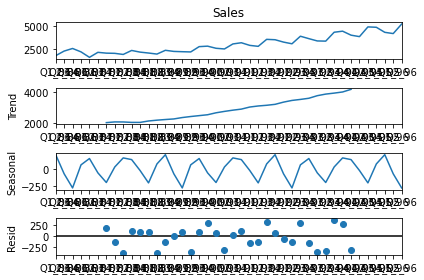

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(series.Sales,period=13)
decompose_ts_add.plot()
plt.show()

In [18]:
# separate out a validation dataset
split_point = len(series) - 10

dataset, validation = series[0:split_point], series[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 32, Validation 10


In [19]:
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

# Persistence/ Base model

In [20]:
# evaluate a persistence model
# load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\Anks\AppData\Local\Temp\ipykernel_10800\2746187420.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

In [21]:
# prepare data
X = train.values
X

array([1734.827   , 2244.960999, 2533.804993, 2154.962997, 1547.818996,
       2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996,
       2128.32    , 2026.828999, 1910.603996, 2331.164993, 2206.549995,
       2173.967995, 2148.278   , 2739.307999, 2792.753998, 2556.009995,
       2480.973999, 3039.522995, 3172.115997, 2879.000999, 2772.      ,
       3550.      , 3508.      , 3243.859993, 3056.      , 3899.      ,
       3629.      , 3373.      ])

In [22]:
X = X.astype('float32')
X

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    ], dtype=float32)

In [23]:
train_size = int(len(X) * 0.50)
train_size

16

In [24]:
train, test = X[0:train_size], X[train_size:]

In [25]:
train

array([1734.827, 2244.961, 2533.805, 2154.963, 1547.819, 2104.412,
       2014.363, 1991.747, 1869.05 , 2313.632, 2128.32 , 2026.829,
       1910.604, 2331.165, 2206.55 , 2173.968], dtype=float32)

In [26]:
test

array([2148.278 , 2739.308 , 2792.754 , 2556.01  , 2480.9739, 3039.523 ,
       3172.116 , 2879.001 , 2772.    , 3550.    , 3508.    , 3243.86  ,
       3056.    , 3899.    , 3629.    , 3373.    ], dtype=float32)

In [27]:
# walk-forward validation
history = [x for x in train]
history

[1734.827,
 2244.961,
 2533.805,
 2154.963,
 1547.819,
 2104.412,
 2014.363,
 1991.747,
 1869.05,
 2313.632,
 2128.32,
 2026.829,
 1910.604,
 2331.165,
 2206.55,
 2173.968]

In [28]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000


In [29]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 387.510


#### ARIMA Hyperparameters

In [30]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [31]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [32]:
'''
import itertools

L1 = [1,2,3,4,5]
L2 = ['A','B','C']
L3 = [9,8,7]

for x,y,z in itertools.product(L1,L2,L3):
    print(x,y,z)
'''

"\nimport itertools\n\nL1 = [1,2,3,4,5]\nL2 = ['A','B','C']\nL3 = [9,8,7]\n\nfor x,y,z in itertools.product(L1,L2,L3):\n    print(x,y,z)\n"

In [33]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\Anks\AppData\Local\Temp\ipykernel_10800\240493752.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

In [34]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [35]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=840.937
ARIMA(0, 0, 1) RMSE=617.578
ARIMA(0, 0, 2) RMSE=454.117
ARIMA(0, 0, 3) RMSE=520.786
ARIMA(0, 1, 0) RMSE=387.510
ARIMA(0, 1, 1) RMSE=406.810
ARIMA(0, 1, 2) RMSE=378.536
ARIMA(0, 1, 3) RMSE=348.402
ARIMA(0, 2, 0) RMSE=580.458
ARIMA(0, 2, 1) RMSE=389.282
ARIMA(0, 2, 2) RMSE=360.512
ARIMA(0, 2, 3) RMSE=364.862
ARIMA(0, 3, 0) RMSE=945.914
ARIMA(0, 3, 1) RMSE=592.679
ARIMA(0, 3, 2) RMSE=431.547
ARIMA(0, 3, 3) RMSE=369.830
ARIMA(0, 4, 0) RMSE=1617.769
ARIMA(0, 4, 1) RMSE=964.507
ARIMA(0, 4, 2) RMSE=633.395
ARIMA(1, 0, 0) RMSE=469.707
ARIMA(1, 0, 1) RMSE=478.488
ARIMA(1, 0, 2) RMSE=414.893
ARIMA(1, 0, 3) RMSE=453.007
ARIMA(1, 1, 0) RMSE=386.372
ARIMA(1, 1, 1) RMSE=400.015
ARIMA(1, 1, 2) RMSE=373.547
ARIMA(1, 1, 3) RMSE=361.555
ARIMA(1, 2, 0) RMSE=561.932
ARIMA(1, 2, 1) RMSE=387.143
ARIMA(1, 2, 2) RMSE=373.001
ARIMA(1, 2, 3) RMSE=388.380
ARIMA(1, 3, 0) RMSE=832.926
ARIMA(1, 3, 1) RMSE=574.919
ARIMA(1, 3, 2) RMSE=527.675
ARIMA(1, 3, 3) RMSE=4722.101
ARIMA(1, 4, 0) RMS

#### Build Model based on the optimized values

In [36]:
import pandas as pd

In [37]:
# save finalized model to file
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,1734.827
Q1_86,
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999
Q2_88,2313.631996


In [38]:
# prepare data
X = train.values
X = X.astype('float32')

In [39]:
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 10)
forecast

array([3596.33673346, 3663.65156849, 3523.67852941, 3531.15813263,
       3603.4910967 , 3577.08471293, 3546.6916097 , 3570.19416477,
       3579.11966885, 3563.81900411])

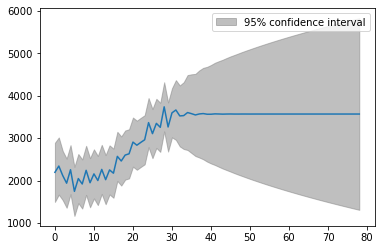

In [40]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,79)
#model_fit.plot_predict(1, 79)
plt.show()

In [41]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

957.8671555798353

# Combine train and test data and build final model

In [42]:
# fit model
data = pd.read_csv("C:\\Users\\Anks\\Downloads\\Airlines+Data.csv", header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [43]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

In [44]:
forecast=model_fit.forecast(steps=10)
forecast

array([3596.33673346, 3663.65156849, 3523.67852941, 3531.15813263,
       3603.4910967 , 3577.08471293, 3546.6916097 , 3570.19416477,
       3579.11966885, 3563.81900411])

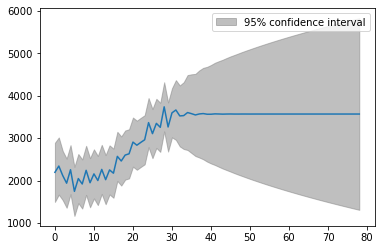

In [45]:
#model_fit.plot_predict(1,90)
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,79)
plt.show()